In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from metropolis_hastings import MetropolisHastings
from utils import HPD, ESS

Effective Sample Size (UK): 1738.0046886403218


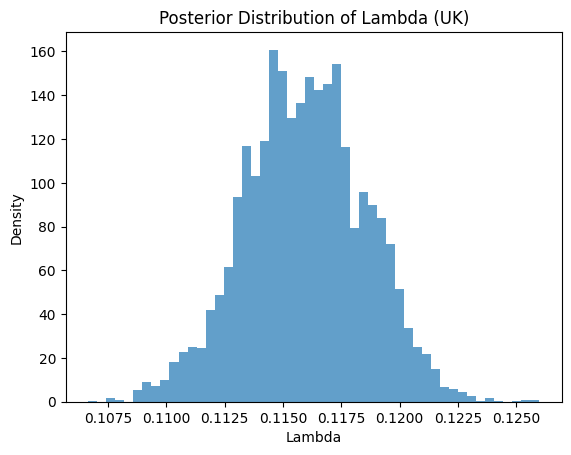

MAP Estimate (UK): 0.11594098621890812
95% Credible Interval (UK): [0.11128260045114048, 0.12137706968129754]
R0 Range (UK): [7.67695603 8.28262418]
Herd Immunity Threshold (UK): [0.86974004 0.87926532]
Effective Sample Size (China): 2652.9997291508603


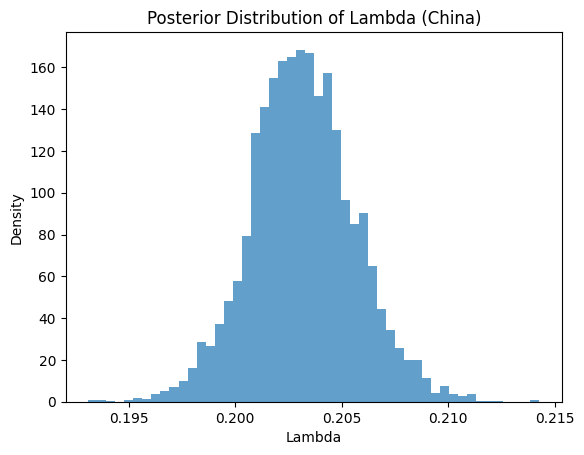

MAP Estimate (China): 0.2031797430118923
95% Credible Interval (China): [0.19831869380902503, 0.20802924076251972]
R0 Range (China): [12.89912163 13.48175445]
Herd Immunity Threshold (China): [0.92247534 0.92582568]


In [3]:

# 데이터 읽기
UK = np.loadtxt('seroprevalence_uk.csv', delimiter=',')
age, I, T = UK[:, 0], UK[:, 1], UK[:, 2]

# 메트로폴리스-헤이스팅스 샘플링
mh = MetropolisHastings(age, I, T, n_samples=11000, sigma=0.01)
lambda_samples, acceptance_prob = mh.run()

# Burn-in 제거
lambda_samples = lambda_samples[1000:]

# 효과적인 샘플 크기 (ESS)
ess = ESS(lambda_samples)
print(f"Effective Sample Size (UK): {ess}")

# 사후 분포 히스토그램
plt.hist(lambda_samples, bins=50, density=True, alpha=0.7)
plt.title("Posterior Distribution of Lambda (UK)")
plt.xlabel("Lambda")
plt.ylabel("Density")
plt.show()

# 최대 사후 확률 추정 (MAP)
lambda_map = np.mean(lambda_samples)
print(f"MAP Estimate (UK): {lambda_map}")

# 신뢰 구간 (HPD)
lower, upper = HPD(lambda_samples, 0.95)
print(f"95% Credible Interval (UK): [{lower}, {upper}]")

# R0 및 집단 면역 계산
L = 60
R0 = 1 + L * np.array([lower, upper])
Herd_immunity = 1 - 1 / R0
print(f"R0 Range (UK): {R0}")
print(f"Herd Immunity Threshold (UK): {Herd_immunity}")

# 중국 데이터 반복
CH = np.loadtxt('seroprevalence_china.csv', delimiter=',')
ageC, IC, TC = CH[:, 0], CH[:, 1], CH[:, 2]

mhC = MetropolisHastings(ageC, IC, TC, n_samples=11000, sigma=0.01)
lambda_samplesC, acceptance_probC = mhC.run()

# Burn-in 제거
lambda_samplesC = lambda_samplesC[1000:]

# 효과적인 샘플 크기 (ESS)
essC = ESS(lambda_samplesC)
print(f"Effective Sample Size (China): {essC}")

# 사후 분포 히스토그램
plt.hist(lambda_samplesC, bins=50, density=True, alpha=0.7)
plt.title("Posterior Distribution of Lambda (China)")
plt.xlabel("Lambda")
plt.ylabel("Density")
plt.show()

# 최대 사후 확률 추정 (MAP)
lambda_mapC = np.mean(lambda_samplesC)
print(f"MAP Estimate (China): {lambda_mapC}")

# 신뢰 구간 (HPD)
lowerC, upperC = HPD(lambda_samplesC, 0.95)
print(f"95% Credible Interval (China): [{lowerC}, {upperC}]")

LC = 60
R0C = 1 + LC * np.array([lowerC, upperC])
Herd_immunityC = 1 - 1 / R0C
print(f"R0 Range (China): {R0C}")
print(f"Herd Immunity Threshold (China): {Herd_immunityC}")
